# Introduction
- This dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

# Importing Libraries

In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import requests as rt 
import tweepy
import json 

# 1.0 Gathering Data 

### 1.1 Gather_from_csv file 

In [2]:
#Reading_data 
twitter_archive_enhanced = pd.read_csv("C:/Users/Muhammad Abdullahi/Downloads/twitter-archive-enhanced.csv")

### 1.2 Gather_from_the Internet

In [3]:
#Making file path or check for it 
folder_name = 'image_predictions_file'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = rt.get(url)

In [4]:
#Opening the file 
with open(os.path.join(folder_name,
                      url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)

In [5]:
#Reading file 
image_predictions = pd.read_csv('C:/Users/Muhammad Abdullahi/Downloads/image_predictions_file/image-predictions.tsv', sep = "\t")

### 1.3 Gather_from_API

In [6]:
# This cell need to API information , so we don't use it here know (Don't run this cell )
# we used data from this API as json file instead. 
""""
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""

'"\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1

### 1.3 Gather_from_json file

In [7]:
#Opening json file 
df_list = []

with open('C:/Users/Muhammad Abdullahi/Downloads/tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [8]:
#Reading json file data
tweet_data = pd.DataFrame(df_list , columns = ['id' , 'retweet_count' , 'favorite_count'])

# 2.0 Assessing_Data 

### 2.1 Assess_'twitter-archive-data'

In [9]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2140,670003130994700288,NaN,NaN,2015-11-26 22:16:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raphael. He is a Baskerville Conquista...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670003130...,10,10,Raphael,None,None,None,None
1748,679062614270468097,NaN,NaN,2015-12-21 22:15:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chompsky. He lives up to his name. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679062614...,11,10,Chompsky,None,None,None,None
374,828372645993398273,NaN,NaN,2017-02-05 22:40:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexander Hamilpup. He was one of the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828372645...,12,10,Alexander,None,None,None,None
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dietrich. He hops at random. Other dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,None,None,None,None
831,768609597686943744,NaN,NaN,2016-08-25 00:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lou. His sweater is too small and he a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768609597...,10,10,Lou,None,None,None,None
1972,673240798075449344,NaN,NaN,2015-12-05 20:41:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Magical floating dog here. Very calm. Always h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673240798...,6,10,None,None,None,None,None
965,750429297815552001,NaN,NaN,2016-07-05 20:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnie. He's a Nova Scotian Fridge Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750429297...,12,10,Arnie,None,None,None,None
770,776819012571455488,NaN,NaN,2016-09-16 16:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody look at this beautifu...,6.798284e+17,4.196984e+09,2015-12-24 00:58:27 +0000,https://twitter.com/dog_rates/status/679828447...,13,10,None,None,None,pupper,None
176,857746408056729600,NaN,NaN,2017-04-28 00:00:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Thor. He doesn't have finals because he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857746408...,13,10,Thor,None,None,None,None
896,759099523532779520,NaN,NaN,2016-07-29 18:53:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He has a drinking problem. Inflatab...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759099523...,7,10,Toby,None,None,None,None


In [11]:
twitter_archive_enhanced.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [13]:
twitter_archive_enhanced.text[5]

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

In [14]:
twitter_archive_enhanced.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [15]:
type(twitter_archive_enhanced.timestamp[0])

str

In [16]:
twitter_archive_enhanced.duplicated().sum()

0

In [17]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [18]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

### 2.2 Assess_image predictions

In [19]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1143,730196704625098752,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg,1,hand_blower,0.296145,False,chain_mail,0.262271,False,toilet_seat,0.149497,False
267,670807719151067136,https://pbs.twimg.com/media/CU8v-rdXIAId12Z.jpg,1,Old_English_sheepdog,0.958035,True,Sealyham_terrier,0.013892,True,Border_collie,0.004601,True
1379,764857477905154048,https://pbs.twimg.com/media/Cp1R0ZTWcAAaPO4.jpg,1,Bernese_mountain_dog,0.792059,True,Appenzeller,0.155034,True,EntleBucher,0.038374,True
1904,852189679701164033,https://pbs.twimg.com/media/C9OV99SXsAEmj1U.jpg,1,barrow,0.423150,False,Bernese_mountain_dog,0.415374,True,EntleBucher,0.067345,True
908,700505138482569216,https://pbs.twimg.com/media/Cbixs3vUUAAqHHN.jpg,1,bath_towel,0.449684,False,Norwegian_elkhound,0.160205,True,Great_Dane,0.048666,True
1926,857746408056729600,https://pbs.twimg.com/media/C-dTzBzXUAQRjYz.jpg,1,Labrador_retriever,0.919832,True,beagle,0.043513,True,golden_retriever,0.023359,True
1200,740995100998766593,https://pbs.twimg.com/media/CkiLHCjUUAAPwUr.jpg,1,malamute,0.454363,True,Samoyed,0.215967,True,Siberian_husky,0.077500,True
708,685198997565345792,https://pbs.twimg.com/media/CYJQxvJW8AAkkws.jpg,1,dishwasher,0.888829,False,stove,0.013411,False,Old_English_sheepdog,0.009671,True
974,706901761596989440,https://pbs.twimg.com/media/Cc9rZlBWwAA56Ra.jpg,1,wild_boar,0.859499,False,hog,0.128981,False,warthog,0.011318,False
1989,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True


In [21]:
image_predictions.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
type(image_predictions.jpg_url[0])

str

In [23]:
image_predictions.duplicated().sum()

0

### 2.3 Assess_tweet data

In [24]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [25]:
tweet_data.sample(10)

,id,retweet_count,favorite_count
732,781308096455073793,2961,7973
1342,704499785726889984,1124,3212
484,814578408554463233,6750,0
1075,739544079319588864,24319,43694
897,758828659922702336,4376,12376
740,780496263422808064,4319,0
599,798673117451325440,6485,0
348,831650051525054464,2243,7908
170,858860390427611136,8805,0
459,817777686764523521,3084,11901


In [26]:
tweet_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [27]:
tweet_data.duplicated().sum()

0

## 1) Quality
 
#### A- twitter_archive_enhanced
- tweet_id should be "string" not "int" 
- some values in rating_denominator column are not equal to "10" 
- some values in both numerator and denominator are invalid
- timestamp should be "data time" not "str" 
- removing retweeted data
- retweeted_status_id  should be removed because we are interested in the tweet alone 
- retweeted_status_user_id should be removed because we are interested in the tweet alone
- retweeted_status_timestamp should be removed because we are interested in the tweet alone
- in_reply_to_status_id, in_reply_to_user_id, expanded_urls and source should be removed because we dont really them for analysis
- Null values are represented as (none) in name column  
- 59 missing value in expanded_urls column 
- some values in the rating_numerator column are over rated
- strange names like ('a' , 'an') in name column 

#### B- image-predictions
- tweet_id should be "string" not "int" 
- some names in the p columns have case irregularities
- missing id's. there are '2075' available instead of '2353' 

#### C- tweet_data
- id column name should be "tweet_id" instead of "id" 
- tweet_id should be "string" not "int" 


### Totall Quality issues : 17

## 2) tidiness

#### A- twitter_archive_enhanced
- doggo, floofer, pupper, and puppo should be in one column not 4 

#### B- image-predictions
- columns name "confg" should be configration

#### For A , B and C 
- combining the three dataframes in one dataframe 

### Totall tidiness issues : 3 

## Making a copy of the datasets 

In [28]:
clean_twitter_archive = twitter_archive_enhanced.copy()
clean_image_predictions = image_predictions.copy()
clean_tweet_data = tweet_data.copy()

# 3.0 Cleaning_Data

## issue_1
- Quality : id column name in tweet_data should be tweet_id not id

#### .Define
- replace the name column from "id" to "tweet_id"

#### .Code 

In [29]:
clean_tweet_data.rename(columns={'id': 'tweet_id'}, inplace=True)

#### .Test

In [30]:
clean_tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## issue_2
- tidiness : combining the three dataframes into one dataframe 

#### .Define
- merging the tables using the merge method 

#### .Code 

In [31]:
clean_twitter_archive = pd.merge(clean_twitter_archive , image_predictions , on= "tweet_id" , how="left") 
clean_twitter_archive = pd.merge(clean_twitter_archive , clean_tweet_data , on= "tweet_id" , how="left")

#### .Test

In [1]:
clean_twitter_archive.T

NameError: name 'clean_twitter_archive' is not defined

## issue_3
- Quality :  tweet_id should be "string" not "int"

#### .Define 
- converet column type with astype method 

#### .Code 

In [33]:
clean_twitter_archive['tweet_id'] = clean_twitter_archive['tweet_id'].astype(str)

#### .Test

In [34]:
type(clean_twitter_archive['tweet_id'][0])

str

## issue_4
- removing retweeted data and replys

#### .Define
- delete retweet by filtering the NaN of retweeted_status_user_id 
- delete replys by filtering the Nan of in_reply_to_user_id

#### .Code 

In [35]:
clean_twitter_archive =clean_twitter_archive[pd.isnull(clean_twitter_archive['retweeted_status_user_id'])]

In [36]:
clean_twitter_archive =clean_twitter_archive[pd.isnull(clean_twitter_archive['in_reply_to_user_id'])]

#### .Test

In [37]:
print(sum(clean_twitter_archive.retweeted_status_user_id))

nan


In [38]:
print(sum(clean_twitter_archive.in_reply_to_user_id))

nan


## issue_5
- tidiness : doggo, floofer, pupper, and puppo should be in one column not 4 

#### .Define
- extract dog stage from text and put it in new column 'dog stage' then drop the real columns 

#### .Code 

In [39]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']
for i in stages:
    clean_twitter_archive[i] = clean_twitter_archive[i].replace("None", "")

In [40]:
clean_twitter_archive['stages'] = clean_twitter_archive.doggo.str.cat(clean_twitter_archive.floofer)
clean_twitter_archive['stages'] = clean_twitter_archive['stages'].str.cat(clean_twitter_archive.pupper).str.cat(clean_twitter_archive.puppo)

In [41]:
clean_twitter_archive = clean_twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [42]:
clean_twitter_archive['stages']=clean_twitter_archive['stages'].replace("", np.nan)

In [43]:
def get_multiple(stages):
    if stages in ['doggopupper', 'doggopuppo', 'doggofloofer']:
        stages = 'multiple'
    else:
        pass
    return stages

In [44]:
clean_twitter_archive['stages'] = clean_twitter_archive['stages'].map(get_multiple)

#### .Test

In [45]:
clean_twitter_archive.stages.value_counts()

pupper      221
doggo        72
puppo        23
multiple     11
floofer       9
Name: stages, dtype: int64

## issue_6
- Quality : some values in rating_denominator column is not "10"

#### .Define
- replace all num values less than 10 to 10 

#### .Code 

In [46]:
clean_twitter_archive.rating_denominator = clean_twitter_archive.rating_denominator.replace( range(0,1000) , 10 )     

#### .Test

In [47]:
clean_twitter_archive.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

## issues_7
- invalid numerator and denominator

#### .Define
- removing invalid numerator and denominator by searching patterns 

#### .Code 

In [48]:
import re 

regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

          #[+-]?([0-9]*[.])?[0-9]+\/[+-]?([0-9]*[.])?[0-9]+
def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''


clean_twitter_archive['pattern'] = clean_twitter_archive['text'].apply(get_pattern)
clean_twitter_archive['fraction'] = clean_twitter_archive['rating_numerator'].astype(str) + '/' + clean_twitter_archive['rating_denominator'].astype(str)
clean_twitter_archive[clean_twitter_archive['pattern'] != clean_twitter_archive['fraction']][['pattern', 'fraction']]

,pattern,fraction
45,13.5/10,5/10
433,84/70,84/10
516,24/7,24/10
695,9.75/10,75/10
763,11.27/10,27/10
902,165/150,165/10
1068,9/11,9/10
1120,204/170,204/10
1165,4/20,4/10
1202,50/50,50/10


In [49]:
clean_twitter_archive=clean_twitter_archive.drop(clean_twitter_archive[clean_twitter_archive['pattern'] != clean_twitter_archive['fraction']].index)

#### .Test

In [50]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2076 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2076 non-null   object 
 4   source                      2076 non-null   object 
 5   text                        2076 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2076 non-null   int64  
 11  rating_denominator          2076 non-null   int64  
 12  name                        2076 non-null   object 
 13  jpg_url                     1950 

## issue_8
- Quality : timestamp should be "data time" not "str"

#### .Define
- convert the column type using to_datetime method

#### .Code 

In [51]:
clean_twitter_archive['timestamp']= pd.to_datetime(clean_twitter_archive['timestamp'])

#### .Test

In [52]:
type(clean_twitter_archive['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

## issue_9,10.11
- Quality :
  - retweeted_status_id  should be removed
  - retweeted_status_user_id should be removed 
  - retweeted_status_timestamp should be removed 
  - in_reply_to_status_id should be removed
  - in_reply_to_user_id should be removed
  - expanded_urls should be removed
  - source should removed

#### .Define
- remove this columns using the drop method

#### .Code 

In [53]:
clean_twitter_archive = clean_twitter_archive.drop(columns=['retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls', 'source'])

#### .Test

In [54]:
clean_twitter_archive.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   object             
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   text                2076 non-null   object             
 3   rating_numerator    2076 non-null   int64              
 4   rating_denominator  2076 non-null   int64              
 5   name                2076 non-null   object             
 6   jpg_url             1950 non-null   object             
 7   img_num             1950 non-null   float64            
 8   p1                  1950 non-null   object             
 9   p1_conf             1950 non-null   float64            
 10  p1_dog              1950 non-null   object             
 11  p2                  1950 non-null   object             
 12  p2_conf             1950 non-null 

## issue_12
- Quality : Nulls represented as (none) in name column  

#### .Define
- replace this values with nulls using replace method and the numpy nan method 

#### .Code 

In [55]:
clean_twitter_archive.name = twitter_archive_enhanced.name.replace("None", value = np.nan )

#### .Test

In [56]:
clean_twitter_archive.name.isnull().sum()

591

## issue_13
- Quality : names p columns have some upper letter and some lower letter  


#### .Define
- make letters capital with title method 

#### .Code 

In [57]:
clean_twitter_archive.p1 = clean_twitter_archive.p1.str.title()
clean_twitter_archive.p2 = clean_twitter_archive.p2.str.title()
clean_twitter_archive.p3 = clean_twitter_archive.p3.str.title()

#### .Test


In [58]:
clean_twitter_archive.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stages,pattern,fraction
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,...,0.085851,False,Banana,0.076110,False,8853.0,39467.0,NaN,13/10,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,...,0.090647,True,Papillon,0.068957,True,6514.0,33819.0,NaN,13/10,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,...,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0,NaN,12/10,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_Towel,0.170278,...,0.168086,True,Spatula,0.040836,False,8964.0,42908.0,NaN,13/10,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,...,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774.0,41048.0,NaN,12/10,12/10


## issue_14
- in columns "confg" should be configration

#### .Define
- edit the name of the column using the rename method 

#### .Code 


In [59]:
clean_twitter_archive.rename(columns={'p1_confident': 'p1_configration'}, inplace=True)
clean_twitter_archive.rename(columns={'p2_confident': 'p2_configration'}, inplace=True)
clean_twitter_archive.rename(columns={'p3_confident': 'p3_configration'}, inplace=True)

#### .Test


In [60]:
clean_twitter_archive.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stages,pattern,fraction
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,...,0.085851,False,Banana,0.076110,False,8853.0,39467.0,NaN,13/10,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,...,0.090647,True,Papillon,0.068957,True,6514.0,33819.0,NaN,13/10,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,...,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0,NaN,12/10,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_Towel,0.170278,...,0.168086,True,Spatula,0.040836,False,8964.0,42908.0,NaN,13/10,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,...,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774.0,41048.0,NaN,12/10,12/10


# 3.0 Storing_Data

In [61]:
clean_twitter_archive.to_csv('C:\\Users\\Muhammad Abdullahi\\Downloads\\twitter_archive_master.csv', index=False)

# 4.0 Analyzing, and Visualizing_Data

In [62]:
clean_twitter_archive

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stages,pattern,fraction
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,...,0.085851,False,Banana,0.076110,False,8853.0,39467.0,NaN,13/10,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,...,0.090647,True,Papillon,0.068957,True,6514.0,33819.0,NaN,13/10,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,...,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0,NaN,12/10,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_Towel,0.170278,...,0.168086,True,Spatula,0.040836,False,8964.0,42908.0,NaN,13/10,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,...,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774.0,41048.0,NaN,12/10,12/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,Miniature_Pinscher,0.560311,...,0.243682,True,Doberman,0.154629,True,41.0,111.0,NaN,5/10,5/10
2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_Ridgeback,0.408143,...,0.360687,True,Miniature_Pinscher,0.222752,True,147.0,311.0,NaN,6/10,6/10
2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9,10,a,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_Shepherd,0.596461,...,0.138584,True,Bloodhound,0.116197,True,47.0,128.0,NaN,9/10,9/10
2354,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7,10,a,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,Redbone,0.506826,...,0.074192,True,Rhodesian_Ridgeback,0.072010,True,48.0,132.0,NaN,7/10,7/10


### 4.1 Dog_stage ratios

## insights 
- pupper is the most popular stage
- floofer is the least popular stage 

### 4.2 The success rate of the algorithms

In [63]:
clean_twitter_archive['p1_dog'].value_counts()

True     1445
False     505
Name: p1_dog, dtype: int64

In [64]:
success_p1 = (1532/(1532+543))*100
success_p1

73.83132530120481

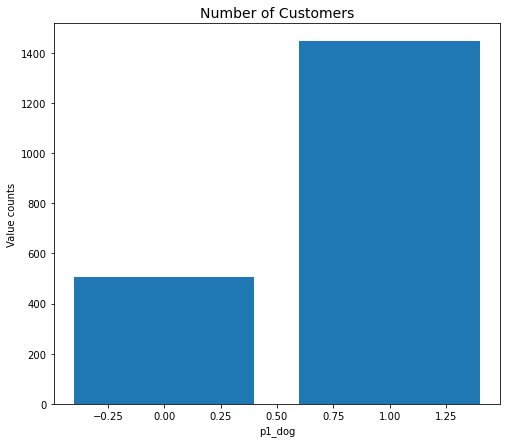

In [65]:
plt.figure(figsize=(8,7))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=clean_twitter_archive['p1_dog'].value_counts().index,
        height=clean_twitter_archive.p1_dog.value_counts().values)
plt.xlabel('p1_dog')
plt.ylabel('Value counts');

In [66]:
clean_twitter_archive['p2_dog'].value_counts()

True     1462
False     488
Name: p2_dog, dtype: int64

In [67]:
success_p2 = (1553/(1553+522))*100
success_p2

74.8433734939759

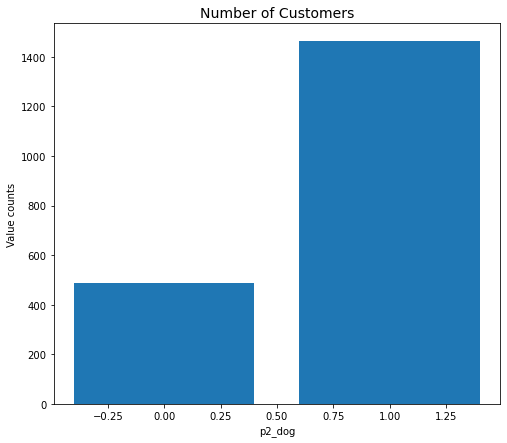

In [68]:
plt.figure(figsize=(8,7))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=clean_twitter_archive['p2_dog'].value_counts().index,
        height=clean_twitter_archive.p2_dog.value_counts().values)
plt.xlabel('p2_dog')
plt.ylabel('Value counts');

In [69]:
clean_twitter_archive['p3_dog'].value_counts()

True     1413
False     537
Name: p3_dog, dtype: int64

In [70]:
success_p3 = (1499/(1499+576))*100
success_p3

72.2409638554217

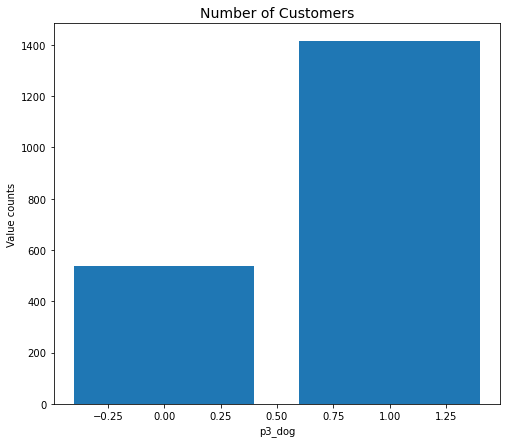

In [71]:
plt.figure(figsize=(8,7))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=clean_twitter_archive['p3_dog'].value_counts().index,
        height=clean_twitter_archive.p3_dog.value_counts().values)
plt.xlabel('p3_dog')
plt.ylabel('Value counts');

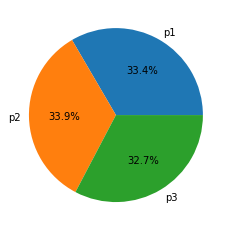

In [72]:
plt.pie([success_p1,success_p2,success_p3],labels=('p1','p2','p3'),autopct ='%1.1f%%')
plt.show()

## insights 
- p2_algorithm is The most successful algorithm
- p3_algorithm is The least successful algorithm

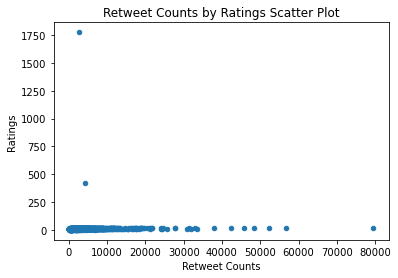

In [73]:
clean_twitter_archive['rating'] = 10 * clean_twitter_archive['rating_numerator'] / clean_twitter_archive['rating_denominator'].astype(float)
clean_twitter_archive.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot');


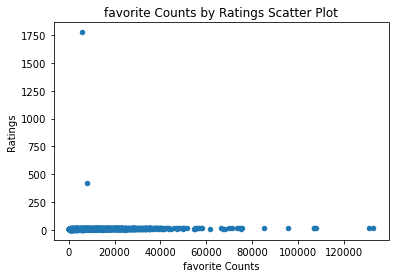

In [74]:
clean_twitter_archive.plot(x='favorite_count', y='rating', kind='scatter')
plt.xlabel('favorite Counts')
plt.ylabel('Ratings')
plt.title('favorite Counts by Ratings Scatter Plot');

## insights
- The highest rating didnt get the most retweets and are not the favorites.

In [75]:
clean_twitter_archive['p1'].value_counts()

Golden_Retriever      133
Labrador_Retriever     91
Pembroke               88
Chihuahua              78
Pug                    54
                     ... 
Timber_Wolf             1
Espresso                1
Bib                     1
Hotdog                  1
Desktop_Computer        1
Name: p1, Length: 372, dtype: int64

In [76]:
clean_twitter_archive['p2'].value_counts()

Labrador_Retriever          94
Golden_Retriever            80
Cardigan                    73
Chihuahua                   41
Chesapeake_Bay_Retriever    40
                            ..
Screw                        1
Coffee_Mug                   1
Sombrero                     1
Handkerchief                 1
Mud_Turtle                   1
Name: p2, Length: 394, dtype: int64

In [77]:
clean_twitter_archive['p3'].value_counts()

Labrador_Retriever    74
Chihuahua             57
Golden_Retriever      44
Eskimo_Dog            35
Kelpie                33
                      ..
Bannister              1
Rotisserie             1
King_Penguin           1
Hand_Blower            1
Partridge              1
Name: p3, Length: 402, dtype: int64

## insights
Labrador retriver is the most common dog in the dataset